# Análisis de la descripción de productos audiovisuales en la plataforma de Netflix (Pt. 2)


**Nombre:** Leobardo García Reyes

**Matrícula:** 1616825

## Carga de librerías

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MultiLabelBinarizer

In [65]:
import re, string, unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [66]:
nltk.download('punkt') # Descargar tokenizar
nltk.download('stopwords') # Descargar stopwords
nltk.download('wordnet') # Descargar lematización


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Carga de archivo

In [67]:
# Carga de archivo
netflix = pd.read_csv('D:/Documentos/Maestría en Ciencia de Datos/Matria PyCD/Base de datos/netflix_titles.csv')
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Contabilizar los tipos de géneros

In [68]:
# Contabilizar los tipos de géneros de productos audiovisuales de Netflix
tipo = ', '.join(netflix['listed_in'].dropna()).split(',')
Counter(tipo)

Counter({'Documentaries': 1,
         ' International TV Shows': 1351,
         ' TV Dramas': 763,
         ' TV Mysteries': 98,
         ' Crime TV Shows': 470,
         ' TV Action & Adventure': 168,
         ' Docuseries': 395,
         ' Reality TV': 255,
         ' Romantic TV Shows': 370,
         ' TV Comedies': 581,
         ' TV Horror': 75,
         ' Children & Family Movies': 641,
         ' Dramas': 2427,
         ' Independent Movies': 756,
         ' International Movies': 2752,
         ' British TV Shows': 253,
         ' Comedies': 1674,
         ' Documentaries': 868,
         ' Spanish-Language TV Shows': 174,
         ' Thrillers': 577,
         ' Romantic Movies': 616,
         ' Music & Musicals': 375,
         ' Horror Movies': 357,
         ' Sci-Fi & Fantasy': 243,
         ' TV Thrillers': 57,
         " Kids' TV": 451,
         ' Action & Adventure': 859,
         ' TV Sci-Fi & Fantasy': 84,
         ' Classic Movies': 116,
         ' Anime Features': 71,
  

## Gráficas los tipos de géneros 

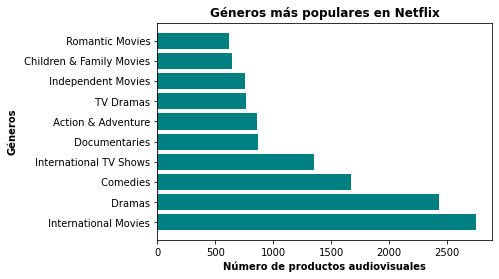

In [69]:
# Gráficar los tipos de géneros de productos audiovisuales de Netflix
conteos = pd.Series(tipo).value_counts().values[:10]
valores = pd.Series(tipo).value_counts().index[:10]
tipo_resultado = pd.DataFrame(list(zip(valores, conteos)), columns = ['value', 'count'])

plt.barh(valores, conteos, color = 'teal')
plt.title('Géneros más populares en Netflix', fontweight = 'bold')
plt.xlabel('Número de productos audiovisuales', fontweight = 'bold')
plt.ylabel('Géneros', fontweight = 'bold')
plt.show()

## Realizar one hot encoding

In [70]:
# One hot encoding múltiple de los tipos de géneros de productos audiovisuales de Netflix
generos = pd.DataFrame({'genero': netflix['listed_in']})
generos

,genero
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
...,...
8802,"Cult Movies, Dramas, Thrillers"
8803,"Kids' TV, Korean TV Shows, TV Comedies"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [71]:
# Este código lo obtuve del siguiente link, ya que no podía ahcer el one hot encoding múltiple
# https://stackoverflow.com/questions/62408093/one-hot-encoding-multiple-categorical-data-in-a-column
genres = np.unique(', '.join(generos['genero']).split(', '))
genres = np.delete(genres, np.where(genres == 'NA'))
genres

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

In [72]:
# Este código lo obtuve del siguiente link, ya que no podía hacer el one hot encoding múltiple
# https://stackoverflow.com/questions/62408093/one-hot-encoding-multiple-categorical-data-in-a-column
for genre in genres:
    generos[genre] = generos['genero'].str.contains(genre).astype('int')

generos.drop('genero', axis = 1, inplace = True)
generos

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8803,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
8804,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Concatenar las columnas de géneros con la base original
nuevo_netflix = pd.concat([netflix, generos], axis=1,)
nuevo_netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,1,0,1,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,1,0,0,0,0,0,1,0,0,0


In [74]:
# Nombre de las columnas
nuevo_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', 'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 

## Seleccionar la columna de descripción y género

In [93]:
# Filtro por el género deseado y guardar archivo csv
#  & (nuevo_netflix['Dramas'] == 1)
filtro_netflix = nuevo_netflix[(nuevo_netflix['Comedies'] == 1)]
filtro_netflix.to_csv('D:/Documentos/Maestría en Ciencia de Datos/Matria PyCD/Base de datos/filtro.csv',
                      header=True, index=False)

## Seleccionar la columna de descripción

In [94]:
# Columna de descripción de la película
filtro_netflix['description']

4       In a city of coaching centers known to train I...
9       A woman adjusting to life after a loss contend...
13      When the clever but socially-awkward Tetê join...
15      Students of color navigate the daily slights a...
22      Newly divorced and denied visitation rights wi...
                              ...                        
8793    When a father of eight and a mother of 10 prep...
8798    A philandering small-town mechanic's political...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
Name: description, Length: 2255, dtype: object

## Primera parte de limpieza de texto
## Convertir texto en minúsculas

In [95]:
# Texto en minúsculas
minuscula = [cadena.lower() for cadena in filtro_netflix['description']]
minuscula[:3]

['in a city of coaching centers known to train india’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.',
 "a woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.",
 "when the clever but socially-awkward tetê joins a new school, she'll do anything to fit in. but the queen bee among her classmates has other ideas."]

## Eliminar números en el texto

In [96]:
# Eliminar números
numeros = [re.sub(r'[0-9]+', '', cadena) for cadena in minuscula]
numeros[:3]

['in a city of coaching centers known to train india’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.',
 "a woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.",
 "when the clever but socially-awkward tetê joins a new school, she'll do anything to fit in. but the queen bee among her classmates has other ideas."]

## Eliminar texto dentro de los paréntesis

In [97]:
# Eliminar texto dentro del parentesís
parentesis = [re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", cadena) for cadena in numeros]
parentesis[:3]

['in a city of coaching centers known to train india’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.',
 "a woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.",
 "when the clever but socially-awkward tetê joins a new school, she'll do anything to fit in. but the queen bee among her classmates has other ideas."]

## Eliminar signos

In [98]:
# Eliminar signos de puntuación
signos = [re.sub(r'[^\w\s]', '', cadena) for cadena in parentesis]
signos[:3]

['in a city of coaching centers known to train indias finest collegiate minds an earnest but unexceptional student and his friends navigate campus life',
 'a woman adjusting to life after a loss contends with a feisty bird thats taken over her garden  and a husband whos struggling to find a way forward',
 'when the clever but sociallyawkward tetê joins a new school shell do anything to fit in but the queen bee among her classmates has other ideas']

## Eliminar espacios en blanco

In [99]:
# Eliminar espacios en blanco
espacios_blancos = [cadena.strip() for cadena in signos]
espacios_blancos[:3]

['in a city of coaching centers known to train indias finest collegiate minds an earnest but unexceptional student and his friends navigate campus life',
 'a woman adjusting to life after a loss contends with a feisty bird thats taken over her garden  and a husband whos struggling to find a way forward',
 'when the clever but sociallyawkward tetê joins a new school shell do anything to fit in but the queen bee among her classmates has other ideas']

## Segunda parte de la limpieza de texto
## Tokenización de las palabras

In [100]:
# Palabras tokenizadas, primer método
tokenizar1 = [cadena.split() for cadena in espacios_blancos]
tokenizar1[0][:5]

['in', 'a', 'city', 'of', 'coaching']

In [101]:
# Palabras tokenizadas, segundo método (Se tarda más)
tokenizar2 = [word_tokenize(cadena) for cadena in espacios_blancos]
tokenizar2[0][:5]

['in', 'a', 'city', 'of', 'coaching']

## Juntar todas las palabras en una lista

In [102]:
# Juntar todas las palabras en una sola lista
descripcion = []
for cadena in tokenizar2:
    for i in cadena:
        descripcion.append(i)
descripcion[:9]

['in', 'a', 'city', 'of', 'coaching', 'centers', 'known', 'to', 'train']

## Seleccionar o añadir stopwords

In [103]:
# Stopwords en ingles
sw = stopwords.words("english")

# Nuevas stopwords
nuevas_sw = ('one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten')

for i in nuevas_sw:
    sw.append(i)

print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Eliminar stopwords de la lista que se creo

In [104]:
# Eliminar stopwords
sin_sw = [cadena for cadena in descripcion if not cadena in sw]
sin_sw[:8]

['city',
 'coaching',
 'centers',
 'known',
 'train',
 'indias',
 'finest',
 'collegiate']

## Seleccionar método de stem y transformar las palabras a su raíz

In [105]:
# Método Stemming
metodo_stemming = PorterStemmer()

palabra_raiz1 = []
for cadena in sin_sw:
    # print('Actual:', cadena, ' -  Stem:', metodo_stemming.stem(cadena))
    palabra_raiz1.append(metodo_stemming.stem(cadena))
    
palabra_raiz1[:8]

['citi', 'coach', 'center', 'known', 'train', 'india', 'finest', 'collegi']

In [106]:
# Método Lematizer
# https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/
metodo_lematizador = WordNetLemmatizer()

palabra_raiz2 = []
for cadena in sin_sw:
    # print('Actual:', cadena, ' -  Lem:', metodo_lematizador.lemmatize(cadena, pos ='v'))
    palabra_raiz2.append(metodo_lematizador.lemmatize(cadena, pos = 'v'))
    
palabra_raiz2[:8]

['city', 'coach', 'center', 'know', 'train', 'indias', 'finest', 'collegiate']

## Gráfica de la frecuencia de palabras

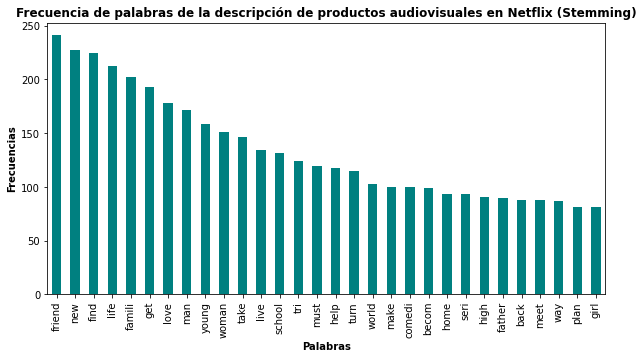

In [107]:
# Palabras raras:
# series - seri
# family - famili
# friends - friend
# become - becom
# documentary - documentari
# story - stori
# try - tri

# Palabras que no aparecen:
# stori
# year
# force
# go
# follow

def gra_pa(datos, titulo = None):
    aux = pd.Series(datos)
    aux.value_counts()[:30].plot.bar(figsize = (10, 5), color = 'teal')
    if titulo: 
        plt.title(titulo, fontweight = 'bold')
    plt.xlabel('Palabras', fontweight = 'bold')
    plt.ylabel('Frecuencias', fontweight = 'bold')

gra_pa(palabra_raiz1, titulo = 'Frecuencia de palabras de la descripción de productos audiovisuales en Netflix (Stemming)')

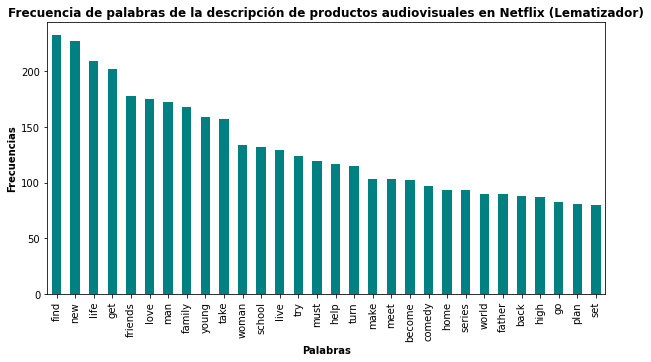

In [108]:
gra_pa(palabra_raiz2, titulo = 'Frecuencia de palabras de la descripción de productos audiovisuales en Netflix (Lematizador)')

## Nube de palabras

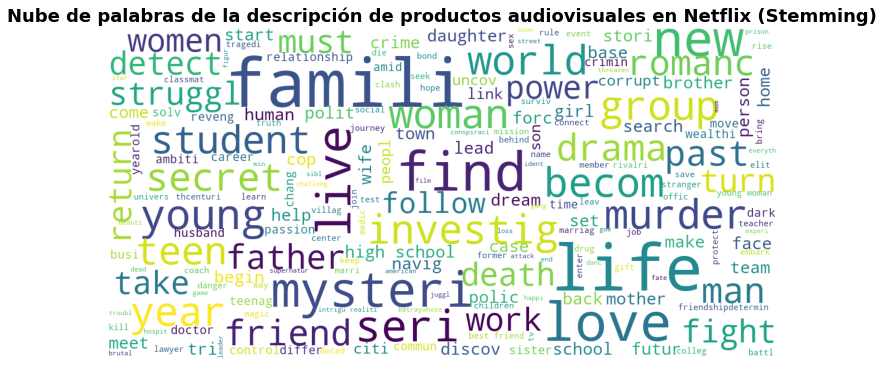

In [92]:
metodo = palabra_raiz1
unir = ''

for cadena in metodo:
    aux = cadena.lower().split()
    unir += " ".join(aux)+" "

def mostrar_nube(unir, titulo = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 1
    ).generate(unir)
    fig = plt.figure(1, figsize = (12, 12))
    plt.axis('off')
    if titulo: 
        plt.title(titulo, fontweight = 'bold', fontsize = 18)
    plt.imshow(wordcloud)
    plt.show()

mostrar_nube(unir, titulo = 'Nube de palabras de la descripción de productos audiovisuales en Netflix (Stemming)')

## Pruebas personales

In [29]:
raro = []
for cadena in sin_sw:
    if(cadena[:3] == 'son'):
        # print(cadena)
        raro.append(cadena)

Counter(raro)

Counter({'son': 21,
         'song': 3,
         'songs': 2,
         'sono': 1,
         'songwriter': 1,
         'sons': 2})

In [264]:
metodo_stemming = PorterStemmer()

prueba = []
for cadena in raro:
    # print('Actual:', cadena, ' -  Stem:', metodo_stemming.stem(cadena))
    prueba.append(metodo_stemming.stem(cadena))
    
Counter(prueba)

Counter({'son': 225,
         'song': 46,
         'sonic': 2,
         'songstress': 3,
         'songwrit': 5,
         'sonoko': 1,
         'songbook': 1,
         'sonapur': 1,
         'sono': 1,
         'soninlaw': 2,
         'songfil': 1,
         'sonni': 1,
         'songbird': 1})